# **Excercise 1: Datasets**

Determine which of the datasets is ready to use without additional cleaning.

There will be used the following five files:

*   data.csv
*   data1.csv
*   data2.csv
*   data3.csv
*   data4.csv



<p align="justify">
This is a justified paragraph in Markdown. Markdown itself does not support text justification, but you can use HTML tags to align text properly.
</p>

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from pathlib import Path # Function to obtain the name of the file

In [59]:
from google.colab import drive # Import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Data preview**

The following functions give an overview of each database

In [60]:
# Function that prints important information of the datasets
def dataframe_description(df, url):

  column_names = df.columns
  rows_num, cols_num = df.shape

  # Get the name using the library pathlib
  file_name = Path(url).name

  # Título
  print(f"{'':<20} REPORT FOR FILE: {file_name}")
  print("--------------------------------------------------------------\n")

  # Information about the dataframe
  print("Classes:", df[column_names[cols_num - 1]].unique(), '\n')
  print("Balance of classes: \n\n", df[column_names[cols_num - 1]].value_counts(), '\n\n')
  print("Number of missing values: \n")
  print(df.isnull().sum(), '\n\n')
  print("Number of special characters: \n")
  print(count_special_characters(df), '\n\n')
  print("Statistical properties:\n\n", df.describe(), '\n\n')
  print("General information of the dataframe: \n")
  df.info()

In [61]:
# Function that counts the number of special characters
def count_special_characters(df):
  column_names = df.columns

  for name in column_names:
      # Convert column to string to handle mixed data types
      column_data = df[name].astype(str)

      # Count special characters (not alphanumeric)
      special_char_count = column_data.str.findall(r'\W').str.len().sum()
      #special_char_count = column_data.apply(lambda x: sum(not char.isalnum() for char in x)).sum()

      print(f"{name}: {special_char_count:<4}")

In [62]:
# Function that displays a histogram
def barplot_graph(df, url):

  column_names = df.columns
  rows_num, cols_num = df.shape # Gets the number of columns and rows

  # Get the name using the library pathlib
  file_name = Path(url).name

  plt.figure(figsize = (4,4)) # Changes the size
  sns.barplot(df[column_names[cols_num - 1]].value_counts())
  plt.title(f"Frecuency of each species from file: '{file_name}'")
  plt.ylabel("Frecuency")
  plt.tight_layout() # Nice layout
  plt.show() # Show the barplot

In [63]:
# Function that calculates a heatmap
def correlation_matrix(df, url):
  # Get filename
  file_name = Path(url).name

  # Number of rows and columns
  column_names = df.columns
  rows_num, cols_num = df.shape

  # Replace '?' with NaN and convert columns to numeric
  df = df.replace('?', pd.NA).apply(pd.to_numeric, errors='coerce')

  # Drop columns with all NaN values
  df = df.dropna(axis=1, how='all')

  # Drop rows with excessive NaNs
  df_cleaned = df.dropna(thresh=df.shape[1] * 0.8)  # Keep rows with at least 80% valid data

  # Check if enough numeric data remains
  if df_cleaned.empty or df_cleaned.shape[1] < 2:
      print("Error: Not enough valid numeric data for correlation matrix.")
      return

  # Separate numeric data (excluding 'num' if it's categorical)
  if column_names[cols_num - 1] in df_cleaned.columns:
      x = df_cleaned.drop(columns=[column_names[cols_num - 1]])
  else:
      x = df_cleaned

  # Ensure at least 2 numeric columns exist
  if x.shape[1] < 2:
      print("There is not enough numeric columns for the correlation matrix.")
      return

  # Standardize data
  scaler = StandardScaler()
  x_scaled = scaler.fit_transform(x)

  # Convert back to DataFrame
  x_scaled = pd.DataFrame(x_scaled, columns=x.columns)

  # Calculate correlation matrix
  corr = x_scaled.corr()

  # Create heatmap
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
  plt.title(f"Correlation matrix of file: {file_name}")
  plt.show()

### **Dataset: data.csv**

In [64]:
url_data = '/content/drive/MyDrive/Artificial Intelligence/Partial exam 1/data.csv'
df_data = pd.read_csv(url_data)
df_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


In [65]:
dataframe_description(df_data, url_data)

                     REPORT FOR FILE: data.csv
--------------------------------------------------------------

Classes: [0 1] 

Balance of classes: 

 num       
0    188
1    106
Name: count, dtype: int64 


Number of missing values: 

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64 


Number of special characters: 

age: 0   
sex: 0   
cp: 0   
trestbps: 1   
chol: 23  
fbs: 8   
restecg: 1   
thalach: 1   
exang: 1   
oldpeak: 294 
slope: 190 
ca: 291 
thal: 266 
num       : 0   
None 


Statistical properties:

               age         sex          cp     oldpeak  num       
count  294.000000  294.000000  294.000000  294.000000  294.000000
mean    47.826531    0.724490    2.982993    0.586054    0.360544
std      7.811812    0.447533    0.965117    0.908648    0.480977
min     28.000000    0.00

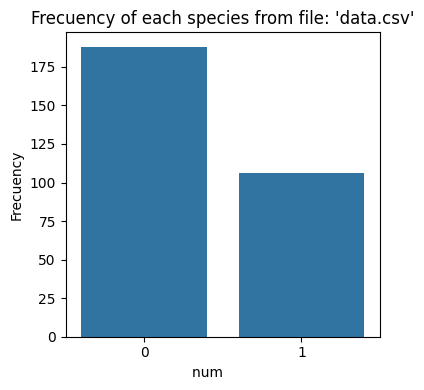

In [66]:
barplot_graph(df_data, url_data)

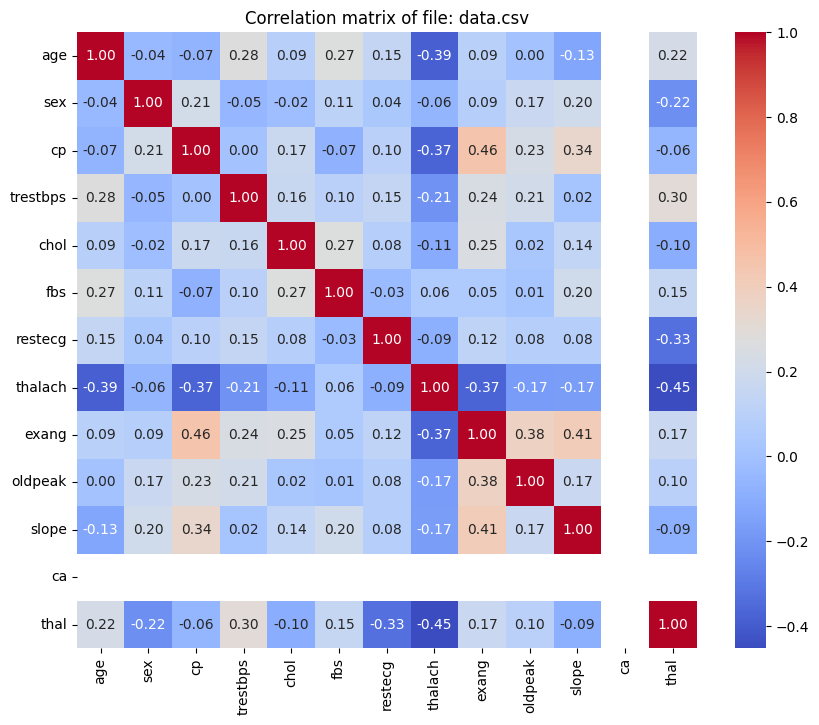

In [67]:
correlation_matrix(df_data, url_data)

<div align="justify">

***Conclusion***

The dataset contains two classes in the last column 'num'. Class 0 contains 188 instances while 1 has 106, it seems to be certain imbalance in the frecuency of both classes. This imbalance can lead to biased models that favor predicting the majority class (0) and leading to poor performance in detecting the minority class (1). We can fix this by using oversampling techniques such as SMOTE (Synthetic Minority Over-sampling Technique).

There are several missing values in features oldpeak (294), ca (291), thal (266) and slope (190). This will cause issues in training models that require numerical input, therefore, we can input some values to the missing cells or drop a whole feature that contains a significant amount of missing values.

The summary statistics reveal useful insights. The age feature has a mean of about 47.83, with a standard deviation of 7.81, suggesting a relatively wide age distribution within the dataset.
The sex feature is binary (0 and 1), with a mean of 0.72, meaning about 72% of the dataset is male (assuming 0 is female and 1 is male).
The cp feature has a relatively balanced distribution across its values, with a mean of 2.98 and a standard deviation of 0.97.
The oldpeak feature has a mean of 0.59.

The heatmap shows small correlations, this may indicate that some features could be discarded or combined (through dimensionality reduction techniques like PCA) since they do not provide much information.

**In a nutshell:** This is a good dataset but it can be enhanced.

</div>

### **Dataset: data1.csv**

In [68]:
url_data1 = '/content/drive/MyDrive/Artificial Intelligence/Partial exam 1/data1.csv'
df_data1 = pd.read_csv(url_data1)
df_data1 # Print dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1.0,2.0,130,132,0,2.0,185,0,0.0,?,?,?,0
1,29,1.0,2.0,120,243,0,0.0,160,0,0.0,?,?,?,0
2,29,1.0,2.0,140,?,0,0.0,170,0,0.0,?,?,?,0
3,30,0.0,1.0,170,237,0,1.0,170,0,0.0,?,?,6,0
4,31,0.0,2.0,100,219,0,1.0,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1.0,4.0,160,331,0,0.0,94,1,2.5,?,?,?,1
290,54,0.0,3.0,130,294,0,1.0,100,1,0.0,2,?,?,1
291,56,1.0,4.0,155,342,1,0.0,150,1,3.0,2,?,?,1
292,58,0.0,2.0,180,393,0,0.0,110,1,1.0,2,?,7,1


In [69]:
dataframe_description(df_data1, url_data1)

                     REPORT FOR FILE: data1.csv
--------------------------------------------------------------

Classes: [0 1] 

Balance of classes: 

 num       
0    188
1    106
Name: count, dtype: int64 


Number of missing values: 

age            0
sex           23
cp            23
trestbps      23
chol          10
fbs           13
restecg       31
thalach       31
exang         31
oldpeak       18
slope          0
ca             0
thal           0
num            0
dtype: int64 


Number of special characters: 

age: 0   
sex: 271 
cp: 271 
trestbps: 1   
chol: 23  
fbs: 8   
restecg: 263 
thalach: 1   
exang: 1   
oldpeak: 276 
slope: 190 
ca: 291 
thal: 266 
num       : 0   
None 


Statistical properties:

               age         sex          cp     restecg     oldpeak  num       
count  294.000000  271.000000  271.000000  263.000000  276.000000  294.000000
mean    47.826531    0.741697    3.014760    0.212928    0.609783    0.360544
std      7.811812    0.438511    0.96213

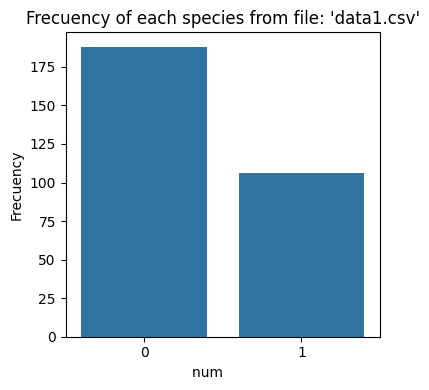

In [70]:
barplot_graph(df_data1, url_data1)

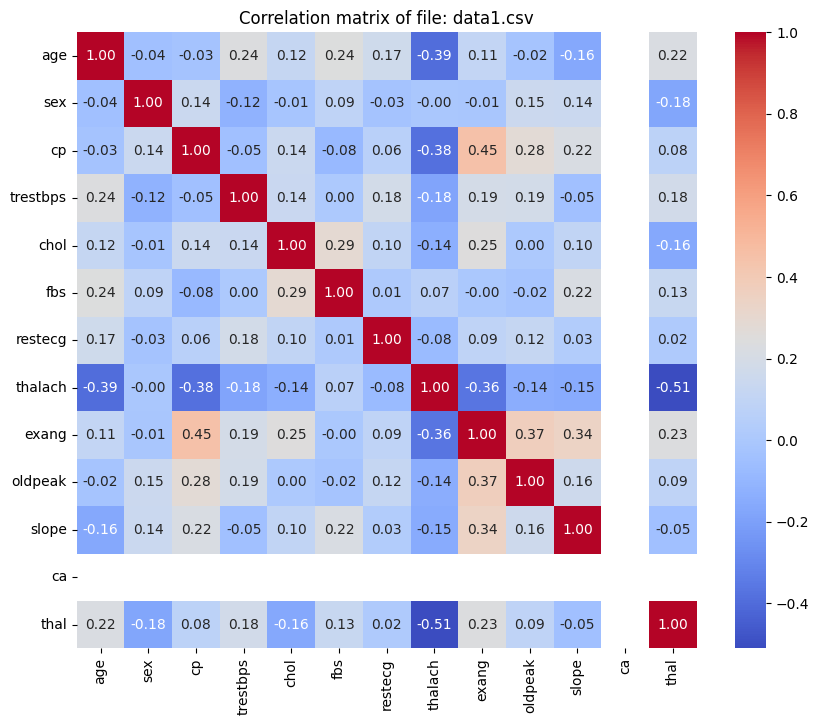

In [71]:
correlation_matrix(df_data1, url_data1)

<div align="justify">  

***Conclusion***

The target variable ‘num’ has two classes, with 188 cases of class 0 and 106 of class 1. That is a bit unbalanced, which could make a model favor the majority class too much. To fix this, we could try oversampling (like SMOTE) or adjusting class weights.
The mayority of features have weird values, like question marks (?) instead of alphanumeric or decimal characters. We could make some cleaning dropping the attributes with more missing data before training the model. In the case these data stay in, they might mess up models that need numerical inputs. Nevertheless, a good approach would be to fill in reasonable values.

Looking at the statistics, age has a pretty wide range, and (cp) seem fairly spread out. The heatmap shows that most features do not have strong correlations with each other, which means some might not be adding much useful information. In that case, we could drop or combine them using something a method of dimensionality reduction to decrease the complexity of the model.

**In a nutshell:** This dataset needs to be previously cleaned.

</div>

### **Dataset: data2.csv**

In [72]:
url_data2 = '/content/drive/MyDrive/Artificial Intelligence/Partial exam 1/data2.csv'
df_data2 = pd.read_csv(url_data2)
df_data2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,0,0,6.0,0
1,29,1,2,120,243,0,0,160,0,0.0,1,0,6.0,0
2,29,1,2,140,243,0,0,17000,0,0.0,2,0,3.0,0
3,30,0,1,170,237,0,1,170,0,0.0,3,0,6.0,0
4,31,0,2,100,219,0,1,150,0,0.0,4,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,289,0,-167.4,1
290,54,0,3,130,294,0,1,100,1,0.0,290,0,-168.0,1
291,56,1,4,155,342,1,0,150,1,3.0,291,0,-168.6,1
292,58,0,2,180,393,0,0,110,1,1.0,292,0,-169.2,1


In [73]:
dataframe_description(df_data2, url_data2)

                     REPORT FOR FILE: data2.csv
--------------------------------------------------------------

Classes: [0 1] 

Balance of classes: 

 num       
0    188
1    106
Name: count, dtype: int64 


Number of missing values: 

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64 


Number of special characters: 

age: 0   
sex: 0   
cp: 0   
trestbps: 0   
chol: 0   
fbs: 0   
restecg: 0   
thalach: 0   
exang: 0   
oldpeak: 294 
slope: 0   
ca: 0   
thal: 577 
num       : 0   
None 


Statistical properties:

               age             sex            cp      trestbps          chol  \
count  294.000000      294.000000    294.000000    294.000000    294.000000   
mean    47.826531     3402.085034     71.003401    213.425170    357.431973   
std      7.811812    58321.141956   1166.249918    

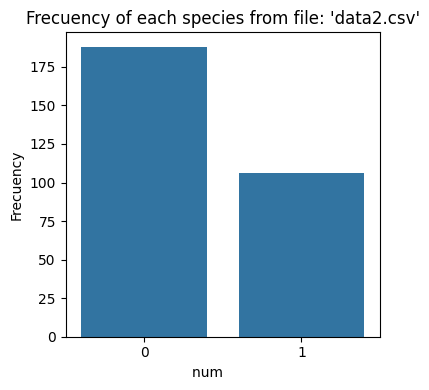

In [74]:
barplot_graph(df_data2, url_data2)

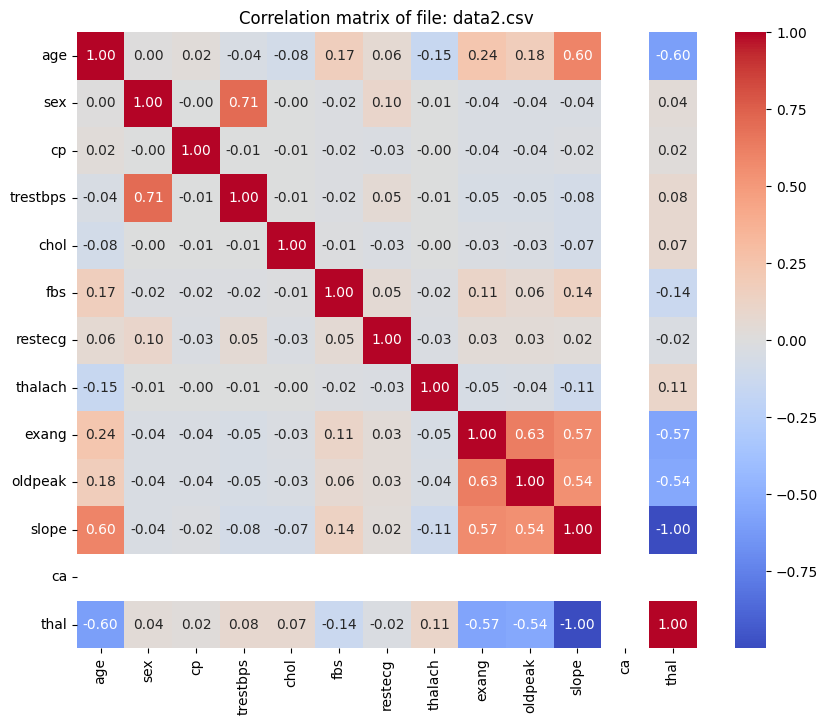

In [75]:
correlation_matrix(df_data2, url_data2)

<div align="justify">

***Conclusion***

This dataset looks contains the same number of cases for each class, for 0 188 and for 1, 106, so it could be fixed using some oversampling techniques or giving more weight to the minority class.

However, there are fewer special characters in each column, specifically, the  oldpeak and thal columns are the ones with more of this cases.

The summary stats reveal some major outliers. Features like 'sex', 'cp', 'trestbps', 'chol', and 'thalach' have extreme values, for example, 'sex' going up to 1,000,000 or 'trestbps' going up to 12,000 when the mean is shown to be 213.42. Besides, most of the features have huge standard deviation, which implies groups are not pretty clustered. These values way out of range suggesting errors that need fixing by using imputation methods, such as hot deck, means, medians or KNN.

The 'thal' feature has some strange negative values, which might not make sense in context. The 'ca' feature has a standard deviation of 0, meaning it does not actually vary, so it might not be useful for modeling.

Lastly, the heatmap shows very low correlation between most of the variables, which can be solved using PCA because the features could not be beneficial to help the model predict correctly.

**In a nutshell: **  Thsi dataset needs some serious cleaning. Fixing extreme outliers, handling special characters, and balancing the classes should improve its quality for analysis.

</div>

### **Dataset: data3.csv**

In [76]:
url_data3 = '/content/drive/MyDrive/Artificial Intelligence/Partial exam 1/data3.csv'
df_data3 = pd.read_csv(url_data3)
df_data3 # Print dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,0,0,6.0,0
1,29,1,2,120,243,0,0,160,0,0.0,1,0,6.0,0
2,29,1,2,140,243,0,0,170,0,0.0,2,0,3.0,0
3,30,0,1,170,237,0,1,170,0,0.0,3,0,6.0,0
4,31,0,2,100,219,0,1,150,0,0.0,4,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,289,0,-167.4,1
290,54,0,3,130,294,0,1,100,1,0.0,290,0,-168.0,1
291,56,1,4,155,342,1,0,150,1,3.0,291,0,-168.6,1
292,58,0,2,180,393,0,0,110,1,1.0,292,0,-169.2,1


In [77]:
dataframe_description(df_data3, url_data3)

                     REPORT FOR FILE: data3.csv
--------------------------------------------------------------

Classes: [0 1] 

Balance of classes: 

 num       
0    188
1    106
Name: count, dtype: int64 


Number of missing values: 

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64 


Number of special characters: 

age: 0   
sex: 0   
cp: 0   
trestbps: 0   
chol: 0   
fbs: 0   
restecg: 0   
thalach: 0   
exang: 0   
oldpeak: 294 
slope: 0   
ca: 0   
thal: 577 
num       : 0   
None 


Statistical properties:

               age         sex          cp    trestbps        chol         fbs  \
count  294.000000  294.000000  294.000000  294.000000  294.000000  294.000000   
mean    47.826531    0.727891    2.982993  132.608844  251.360544    0.078231   
std      7.811812    0.445804    0.965117   1

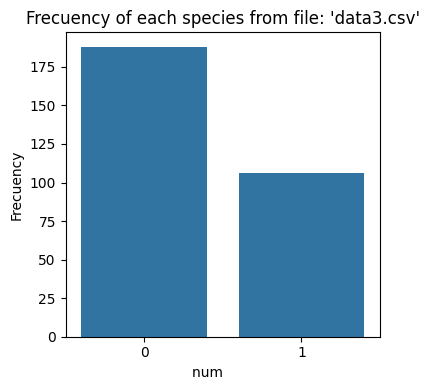

In [78]:
barplot_graph(df_data3, url_data3)

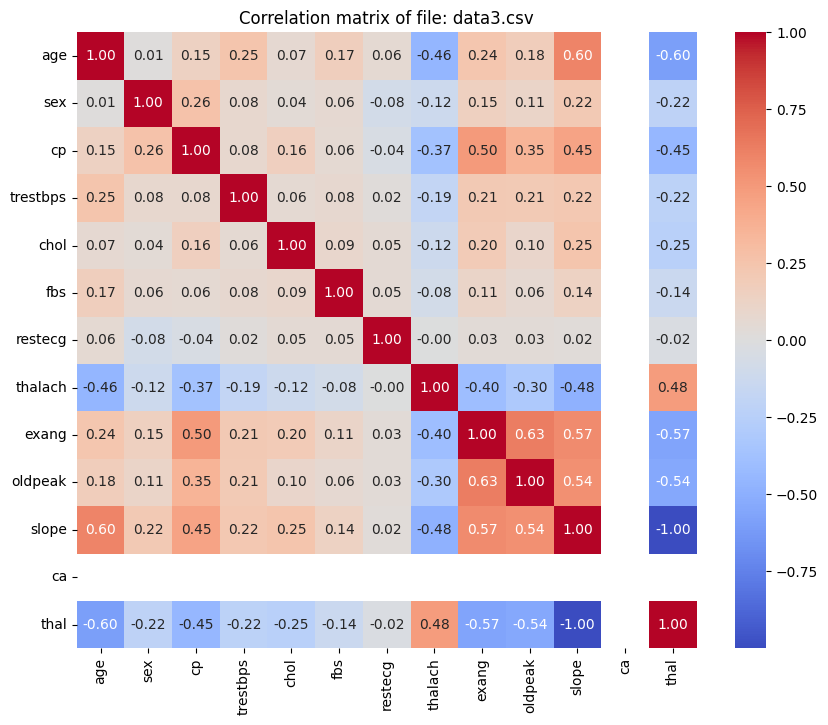

In [79]:
correlation_matrix(df_data3, url_data3)

<div align="justify">

***Conclusion***

This dataset has a class imbalance, with 188 cases for class 0 and 106 for class 1, which could affect model performance. Using oversampling, undersampling, or adjusting class weights can help mitigate this issue.

Regarding data quality, there are no missing values, but special characters appear in oldpeak and thal, which indicates possible inconsistencies that require cleaning. Additionally, the thal feature contains negative values, which likely do not make sense in context and should be examined, so we should consider removing or changing this values using imputation methods.

The summary statistics reveal potential outliers. For instance, 'chol' goes from 85 to 603, while 'trestbps' varies from 92 to 200, showing high variability. Most features have large standard deviations, suggesting significant dispersion that may require normalization or transformation. The 'ca' feature has a standard deviation of 0, meaning it does not provide useful variation and might be removed.

Finally, the correlation matrix shows that the mayority of attributes between have low correlation, which could impact the predictive power. Dimensionality reduction techniques like PCA might help identify the features that best explain variabitlity .

**In a nutshell:** This dataset needs cleaning, handling outliers, balancing classes, and feature selection to improve its quality for model training.

### **Dataset: data4.csv**

In [80]:
url_data4 = '/content/drive/MyDrive/Artificial Intelligence/Partial exam 1/data4.csv'
df_data4 = pd.read_csv(url_data4)
df_data4 # Print dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,245,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,1
290,54,0,3,130,294,0,1,100,1,0.0,1
291,56,1,4,155,342,1,0,150,1,3.0,1
292,58,0,2,180,393,0,0,110,1,1.0,1


In [81]:
dataframe_description(df_data4, url_data4)

                     REPORT FOR FILE: data4.csv
--------------------------------------------------------------

Classes: [0 1] 

Balance of classes: 

 num       
0    188
1    106
Name: count, dtype: int64 


Number of missing values: 

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
num           0
dtype: int64 


Number of special characters: 

age: 0   
sex: 0   
cp: 0   
trestbps: 0   
chol: 0   
fbs: 0   
restecg: 0   
thalach: 0   
exang: 0   
oldpeak: 294 
num       : 0   
None 


Statistical properties:

               age         sex          cp    trestbps        chol         fbs  \
count  294.000000  294.000000  294.000000  294.000000  294.000000  294.000000   
mean    47.826531    0.724490    2.982993  132.642857  247.476190    0.068027   
std      7.811812    0.447533    0.965117   17.625755   66.964851    0.252222   
min     28.000000    0.000000    1.000000   

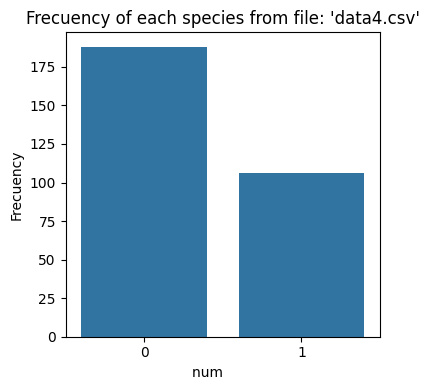

In [82]:
barplot_graph(df_data4, url_data4)

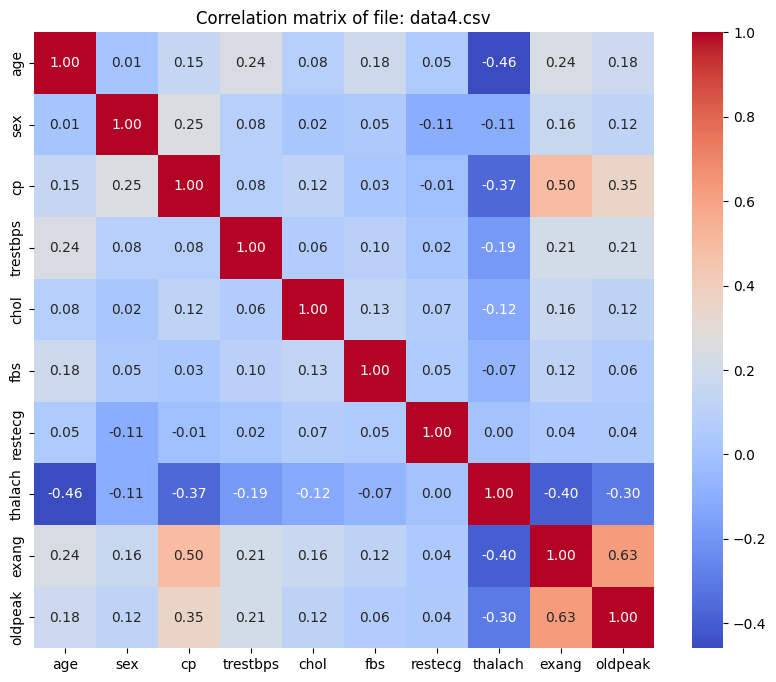

In [83]:
correlation_matrix(df_data4, url_data4)

<div align="justify">

***Conclusion***

This dataset exhibits a class imbalance, with 188 cases for class 0 and 106 for class 1, which could lead to biased model performance and it may beneficial to use some oversampling techniques sucha as SMOTE.

It has no missing values, but the oldpeak feature contains 294 special character cases, indicating potential data inconsistencies that need cleaning. In this particular case, this feature could be deleted, since the other numeric attributes provide strong information as we can see in their correlations levels in the heatmap. The statistical summary shows wide ranges and high standard deviations, particularly in features like chol (85 to 603) and trestbps (92 to 200), suggesting extreme values that could be outliers.

**In a nutshell:** This dataset is best to train a model, it looks of high quality, but it can be beneficial to make some previous cleaning (as columns dropping) to make it even better.

</div>

# **Excercise 2: Metrics**

**Case 1:** Speech Recognition in Virtual Assistants

An AI model transcribes voice commands for a virtual assistant.

**Model Metrics:**

*   Precision: 0.87
*   Recall: 0.83
*   Accuracy: 0.90
*   F1-score: 0.85

Confusion matrix:

[[(TP) 420, 80 (FN)],

[(FP) 40, 460 (TN)]]

<div align="justify">

The following values are found after calculating the metrics based on the confusion matrix, which differ slightly to the provided metrics:

*   Precision: 0.91
*   Recall: 0.84
*   Accuracy: 0.88
*   F1-score: 0.88

The speech recognition model for the virtual assistant performs well, achieving 88% accuracy. The precision of 0.91 indicates that the model is very good at transcribing valid voice commands, meaning that when the assistant recognizes something as a command, it’s highly likely to be correct. The recall of 0.84 shows that the model successfully identifies 84% of all actual positive cases, meaning that there are some false negatives, but the model still captures a significant portion of them.

In this scenario, false negatives (FN) could be considered more problematic than false positives. This is because when the virtual assistant fails to recognize a valid command, it might lead to frustration for the user. Missing commands impact the user experience, causing them to perceive the assistant is unreliable and potentially abandoning the tool, as it fails to complete tasks properly.

Finally, the F1-score of 0.88 balances precision and recall, confirming that the model is maintaining a good performance by effectively minimizing both false positives and false negatives.

</div>

**Case 2:** Predicting Failures in Industrial Machinery

A predictive maintenance model forecasts whether a machine will fail within the next 7 days.

**Model Metrics:**

*   Precision: 0.80
*   Recall: 0.70
*   Accuracy: 0.85
*   F1-score: 0.75

Confusion matrix:

[[(TP) 140, 60 (FN)],

[(FP) 90, 710 (TN)]]

<div align="justify">

Using the confusion matrix to validate the values of the given metrics, one can notice that Precision and F1-Score are slightly different:

*   Precision: 0.61
*   F1-Score: 0.65

Predicting failures in industrial machinery is crucial for the efficiency of many companies.

The accuracy of 0.85 seems promising at first, but this metric alone does not fully represent the model's effectiveness, especially in cases where there may be a class imbalance. Accuracy does not differentiate between how well the model predicts each class, so the number of true negatives (TN) could be inflating the score.

The precision of 0.61 indicates that, when the model predicts a failure, it's correct about 61% of the time. This is not terrible, however it is not perfect either, and it suggests that the model is making a fair number of false positives (incorrectly predicting a failure when there is not one). This can be problematic in industrial machinery failure predictions because false positives could result in unnecessary maintenance, which could be costly.

On the other hand, the recall shows that the model correctly identifies 70% of all actual failures (true positives). Missing these failures could lead to undetected machinery issues, which is risky for the operations.

Finally, the F1-Score of 0.65 gives an idea of balance between precision and recall and offers a better understanding of the model’s performance. This score  0.65 is decent but it indicates room for improvement, especially in minimizing false positives and false negatives.

</div>

**Case 3:** Product Recommendation in an Online Store

A recommendation system suggests products based on user purchase history.

**Model metrics:**
*   Precision: 0.78
*   Recall: 0.65
*   Accuracy: 0.80
*   F1-score: 0.71

Confusion matrix:

[[(TP) 260, 140 (FN)],

[(FP) 110, 690 (TN)]]

<div align="justify">

For this case, some values of the metrics also differ in comparison to the confusion matrix. Here are the recalculated values:

*   Precision: 0.79
*   Accuracy: 0.70
*   F1-score: 0.68

Looking at the metrics, the model does a decent job but could definitely use some improvements. Accuracy of 0.70 might seem okay at first, but it doesn't tell the whole story. It’s possible that the model is just doing a good job at predicting the non-relevant items (true negatives) and not as good with recommending the right products (true positives).

The precision is pretty solid at 0.79, meaning that when the model recommends a product, there's a good chance that recommendation is relevant. This is important in a recommendation system, as you do not want to waste a user’s time by showing them products or services they aren't interested in because costumers could quit. However, the recall of 0.65 indicates that the model is missing 35% of all the relevant products.

The F1-Score of 0.68 balances both precision and recall. It’s not terrible, but it shows that there's room for improvement, especially in making sure that the model catches more relevant products without distracting users with irrelevant ones.

</div>

# **Excercise 3: Search algorithm**

<div align="justify">

We have a directed graph that represents a communication network
between servers. Each node represents a server, and each edge
represents a connection with an associated cost (transmission time
in milliseconds). The objective is to find the optimal route from a
start server to a destination server using search algorithms

</div>

## **Uninformed graphs**

There is just one uniformed algorithm that reach the optimal route and uses a graph with cost:

*   UCS

In [84]:
import heapq # Priority queue
from collections import deque # Import queue

# For plotting the graph
import networkx as nx
import matplotlib.pyplot as plt

In [85]:
# Maze with cost in a dictionary form
maze_with_cost = {
  'A': [('B', 10), ('C', 15)],
  'B': [('D', 12)],
  'C': [('D', 10)],
  'D': [('E', 5)],
}

### **Uniform cost search algorithm**

In [86]:
# Uniform cost search algorithm
def UCS(graph, start, end):
  # Priority queue stores tuples of (cost, node, path)
  priority_queue = [(0, start, [])]
  visited = set()  # Set to keep track of visited nodes

  while priority_queue:
      # Extract the node with the lowest cost from the priority queue
      cost, node, path = heapq.heappop(priority_queue)

      if node in visited: # If the node has already been visited, we skip it
          continue
      visited.add(node)  # Mark the node as visited

      # Update the path with the current node
      path = path + [node]

      # If we reached the end node, then return the result
      if node == end:
          # Prints a message
          print(f"The path would cost: {cost}. Shortest path is: ")
          return path

      # Retrieves all neighbors of node
      for neighbor, edge_cost in graph.get(node, []):
          if neighbor not in visited: # If the neighbor has not been visited, we add it to the priority queue

              # Push the neighbor into the priority queue with updated cost and path
              heapq.heappush(priority_queue, (cost + edge_cost, neighbor, path))

  return "No path found"

In [87]:
shortest_path_graph = UCS(maze_with_cost, 'A', 'E')

The path would cost: 27. Shortest path is: 


## **Informed algorithms**

There are just two uniformed algorithms that reach the optimal route, use a graph with cost and heruistics:

*   A*
*   A* Tree Search

In [88]:
# Heruistics
heuristic_values = {
    'A': 20,
    'B': 15,
    'C': 10,
    'D': 5,
    'E': 0,
}

### **A* algorithm**

In [89]:
def a_star_search(graph, start, goal, heuristic_values):

  open_list = [] # Create a list that stores tuples
  initial_heuristic = heuristic_values.get(start, float('inf'))
  heapq.heappush(open_list, (initial_heuristic, 0, start, [start]))

  # The closed_set keeps track of nodes that have been completely visited
  closed_set = set()

  while open_list:
      # Pop the node with the smallest total estimated cost from the priority queue
      total_estimated_cost, path_cost, current_node, path_so_far = heapq.heappop(open_list)

      # Check if we have reached the goal node
      if current_node == goal:
          return f"Path found: {path_so_far}. Total cost: {path_cost}"

      # If the node was already visited we skip it
      if current_node in closed_set:
          continue
      closed_set.add(current_node)

      # Expand the current node's neighbors
      for neighbor, edge_cost in graph.get(current_node, []):
          # Skip neighbor if it has already been processed
          if neighbor in closed_set:
              continue

          new_path_cost = path_cost + edge_cost # Compute new cost from start to neighbor
          heuristic_neighbor = heuristic_values.get(neighbor, float('inf')) # Retrieve the heuristic value for the neighbor

          # Compute the total estimated cost for the neighbor
          new_total_estimated_cost = new_path_cost + heuristic_neighbor

          new_path = path_so_far + [neighbor] # Construct the new path

          # Push the neighbor into the priority queue
          heapq.heappush(open_list, (new_total_estimated_cost, new_path_cost, neighbor, new_path))

  return "No path found"

In [90]:
a_star_search(maze_with_cost, 'A', 'E', heuristic_values)

"Path found: ['A', 'B', 'D', 'E']. Total cost: 27"

### **A* tree algorithm**

In [91]:
def a_tree_search(graph, start, goal, heuristic_values):
  # Start with the starting node
  initial_h = heuristic_values.get(start, float('inf'))  # Use the heuristic value for the start node
  open_list = [(initial_h, 0, start, [start])]

  # Create set
  closed_set = set()

  while open_list:
      # Pop the node with the smallest value
      total_cost, cost_so_far, current, path = heapq.heappop(open_list)

      # If the current node is the goal, return the path and total cost
      if current == goal:
          return f"Path found: {path}. Total cost: {cost_so_far}" # Print path


      # If the node has already been visited the skip it
      if current in closed_set:
          continue
      closed_set.add(current)

      # Expand neighbors of the current node
      for neighbor, edge_cost in graph.get(current, []):
          if neighbor in closed_set:
              continue  # Skip already processed neighbors

          new_cost = cost_so_far + edge_cost  # Update cumulative cost g

          # Get the heuristic value for the neighbor (use infinity if missing)
          new_h = heuristic_values.get(neighbor, float('inf'))
          new_total_cost = new_cost + new_h # formula: f = g + h
          new_path = path + [neighbor] # Extend the current path

          # Push the neighbor into the priority queue
          heapq.heappush(open_list, (new_total_cost, new_cost, neighbor, new_path))

  return "No path found"

In [92]:
a_tree_search(maze_with_cost, 'A', 'E', heuristic_values)

"Path found: ['A', 'B', 'D', 'E']. Total cost: 27"

## **Printing the graph**

In [93]:
def plot_weighted_graph(graph_dict, path):
    G = nx.Graph() # Create a graph

    for node, neighbors in graph_dict.items(): # Add nodes and edges from the dictionary to the graph
        for neighbor, weight in neighbors:
            G.add_edge(node, neighbor, weight=weight)

    # Plot the whole graph
    plt.figure(figsize=(6, 6))
    plt.title("Graph obtained from dictionary")

    pos = nx.spring_layout(G)  # Layout type
    labels = nx.get_edge_attributes(G, 'weight')  # Get the weights of every edge
    nx.draw(G, pos=pos, with_labels=True, node_size=2000, font_size=10, font_weight="bold")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)

    # Plot the path

    path_edges = [] # Empty list to store the edges

    # Loop through the path and extract each pair of consecutive nodes
    for i in range(len(path) - 1):
        # Append each pair of consecutive nodes
        path_edges.append((path[i], path[i + 1]))# Extract edges that are part of the path

    # Draw the path edges in a different color (highlight)
    nx.draw_networkx_edges(G, pos=pos, edgelist=path_edges, edge_color="red", width=3)

    plt.tight_layout() # Have a nice layout
    plt.show()

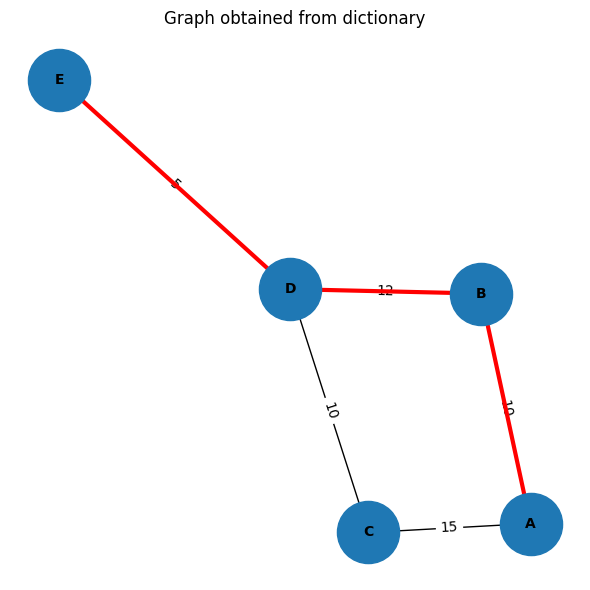

In [94]:
# Calling function to make the graph from the dictionary representation
plot_weighted_graph(maze_with_cost, shortest_path_graph)